# (noshowappointments)
## by (Ibrahim Basal)

## Preliminary Wrangling

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment . A number of characteristics about the patient are included in each row like (PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,
Alcoholism,Handcap,SMS_received,No-show) those characteristics will help me to predict whether or not patients show up for their appointment

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('noshowappointments.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.info())
print(df.head(10))

(110527, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.9872

### What is the structure of your dataset?

> There are 110527 Patient in the dataset with 14 features(PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,
Alcoholism,Handcap,SMS_received,No-show). we have the AppointmentID that differ every patient and other.
Most variables are numeric in nature, but the variables Gender and No-show are ordered factor variables with the following levels

> Gender  : M , F

> No-show : Yes , No
### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting if a patient will show up for their scheduled appointment?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i think the(Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received) can help me to predict.

## Univariate Exploration

> I'll start by looking at the  main variable of interest : Gender

In [4]:
#set a variable to basic color
color = sb.color_palette()[0]

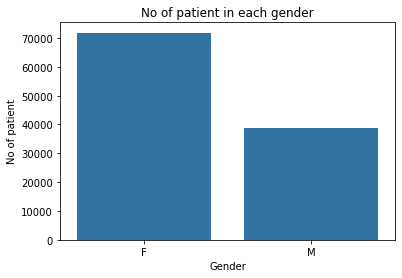

In [5]:
# start with a countplot of Gender
sb.countplot(data=df,x='Gender',color=color)
plt.title('No of patient in each gender')
plt.xlabel('Gender')
plt.ylabel('No of patient');

>Most patient people are Female

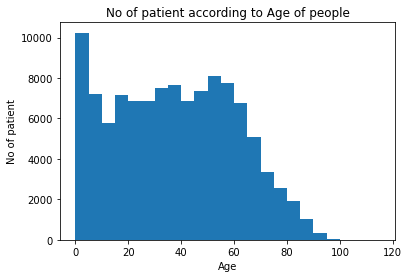

In [6]:
# then we start plotting Age
bins = np.arange(0,df['Age'].max()+5,5)
plt.hist(df['Age'],bins = bins)
plt.title('No of patient according to Age of people')
plt.xlabel('Age')
plt.ylabel('No of patient');

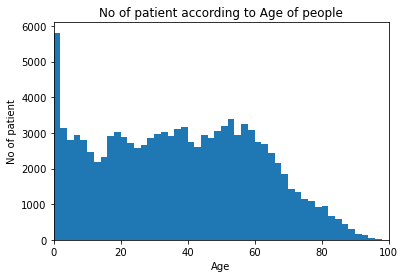

In [53]:
# plotting Age  with a standard-scaled plot
bins = np.arange(0,df['Age'].max()+2,2)
plt.hist(df['Age'],bins = bins)
plt.xlim(0,100)
plt.title('No of patient according to Age of people')
plt.xlabel('Age')
plt.ylabel('No of patient');

> it is skewed to the right. which means the older the people are the more likely they can't go to a doctor or they are already dead.

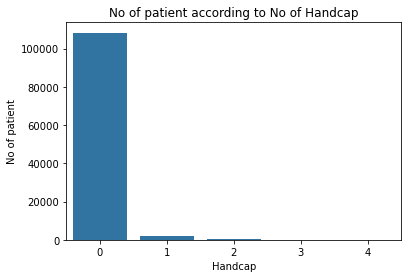

In [54]:
#plotting Handcap 
sb.countplot(data=df,x='Handcap', color=color)
plt.title('No of patient according to No of Handcap')
plt.xlabel('Handcap')
plt.ylabel('No of patient');

> Most of patient don't have Handcap

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> variables of interest age and gender are clearly obvious and i didn't need to perform any transformations

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> i didn't do any perform any operations on the data

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [55]:
#crete DataFrame of people who 's attend appointment
data_show_up = df.loc[df['No-show']=='Yes']
#crete DataFrame of the Gender of patients
F_show_up = df.loc[df['Gender'] == 'F']
M_show_up = df.loc[df['Gender'] == 'M']

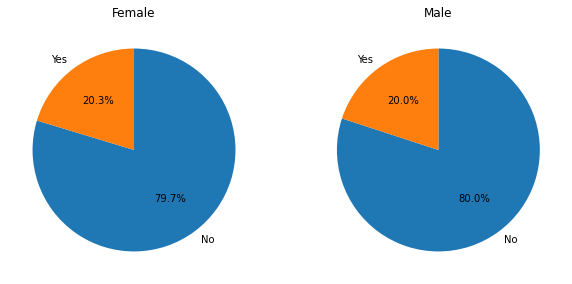

In [56]:
# let's plot the two Gender to indicate the frequancy of who attend and who n't in the two Gender
plt.figure(figsize=(10,10))
plt.subplot(121)
F_counts = F_show_up['No-show'].value_counts()
plt.pie(F_counts, labels = F_counts.index, startangle = 90,counterclock = False,autopct='%1.1f%%')
plt.title('Female');

plt.subplot(122)
M_counts = M_show_up['No-show'].value_counts()
plt.pie(M_counts, labels = M_counts.index, startangle = 90,counterclock = False,autopct='%1.1f%%')
plt.title('Male');

> Most of patient who 's go to the Appointment is Female

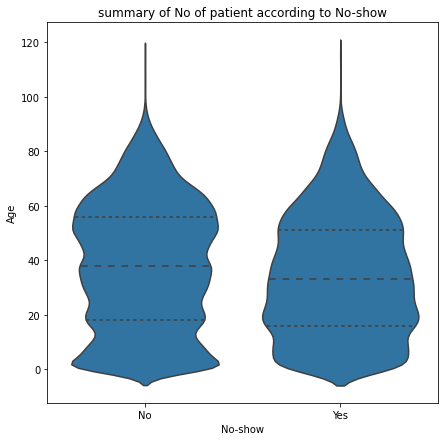

In [57]:
# start to plot Age against No-show
plt.figure(figsize = [7 ,7])
sb.violinplot(data =df,y='Age',x='No-show',color=color,inner='quartile' )
plt.title('summary of No of patient according to No-show')
plt.xlabel('No-show')
plt.ylabel('Age');

> according to this plot it 's indicate that the age has an effect on the No-show.
the median age of people who attend is about 33 years old and who n't attend is about 38 years old

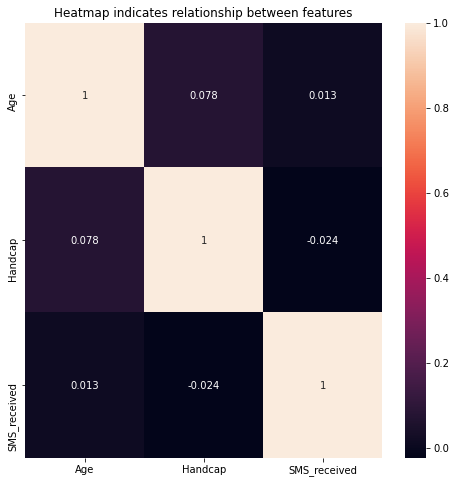

In [58]:
#trying to found an relationship between features
plt.figure(figsize=(8,8))
df_temp = df[['Age','Handcap','SMS_received' ]].copy()
sb.heatmap(df_temp.corr(),annot=True)
plt.title('Heatmap indicates relationship between features');

>most effective features are(Age , Handcap)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> here age is high effective ,the larger and the lower the age the lower people are showed up because newborn can't go alone and older also may be can't go alone
  
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> according to heatmap handcap is effective but due to zeros of handcap it isn't clear to show up by visualization

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

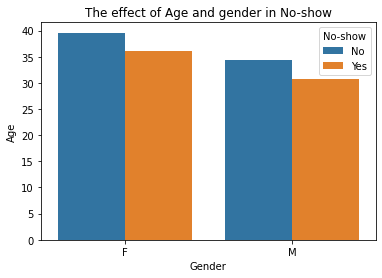

In [59]:
#Trying to show the effect of age and gender on no-show
sb.barplot(data=df, x='Gender', y='Age', hue='No-show', ci=None)
plt.title('The effect of Age and gender in No-show')
plt.xlabel('Gender')
plt.ylabel('Age');

> mean age of female attend the appointment is about 35 years old


>  mean age of male attend the appointment is about 30 years old

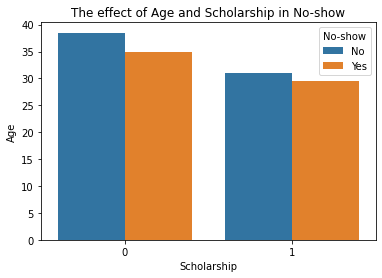

In [60]:
#Trying to show the effect of age and Scholarship on no-show
sb.barplot(data=df, x='Scholarship', y='Age', hue='No-show', ci=None)
plt.title('The effect of Age and Scholarship in No-show')
plt.xlabel('Scholarship')
plt.ylabel('Age');

> average age for female received Scholarship and go  is 35 years old but female didn't go is 38 years old

> average age for male received Scholarship and go  is 29 years old but female didn't go is 0 years old

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> gender may be effective here because average mean of age of female is greater than average mean of age of male 

### Were there any interesting or surprising interactions between features?

> No there weren't any interesting interactions between features